## Population Lecture I



### Introduction



Today we&rsquo;ll introduce some key &ldquo;stylized facts&rdquo; about human
population and its growth.  None of these are &ldquo;causal&rdquo; statements,
just observations about relationships.

-   **Fact I:** Population growth is fundamentally exponential, but the
    rate of growth has fallen over time.
-   **Fact II:** Population growth rates are generally higher in places
    where people are poorer.
-   **Fact III:** Variation in growth rates across countries is
    accounted for more by variation in fertility than by mortality.



### Getting Data



#### The World Development Indicators & `wbdata`



The World Bank maintains a large set of &ldquo;World Development Indicators&rdquo; (WDI),
including information on population.  

-   API for WDI is available at [https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation)

-   A `python` module that uses the API is `wbdata`, written by Oliver Sherouse.

-   Available at [http://github.com/OliverSherouse/wbdata](http://github.com/OliverSherouse/wbdata).

-   Documented at [https://wbdata.readthedocs.io](https://wbdata.readthedocs.io).



#### Getting Population Data Using wbdata



##### Goals



We want to devise ways to visualize the following:

-   Global population growth from 1960 to the present;
-   Population growth rates versus GDP per capita;
-   Age-sex population pyramids.



##### Methods (using wbdata)



We walk through the process of getting data from the WDI into a
`pandas` DataFrame. 

The `wbdata` module has several key functions we&rsquo;ll want to use:

-   **`search_countries()`:** Returns code for different countries or
    regions.
-   **`get_source()`:** Gives list of different data sources that can
    be accessed using the module; returns a numeric key;
-   **`get_indicator()`:** Given a source, this returns a list of
    available variables (indicators).
-   **`get_dataframe()`:** Given a source and a list of indicators,
    this returns a dataframe populated with the requested data
    for whatever

Begin by importing the module:



In [1]:
## If import fails with "ModuleNotFoundError"
## uncomment below & try again
# !pip install wbdata

import wbdata

# add a test comment
# add test comment 2

###### `wbdata.search_countries()`



What countries and regions are available?  Looking up the country
  codes, or searching for particular strings:



In [2]:
import wbdata

# Return list of all country/region codes:
wbdata.get_country()

# Return list matching a query term:
#wbdata.search_countries("World")

## Try your own search!
# wbdata.search_countries("")

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

###### `wbdata.get_source()`



To see possible datasets we can access via the API, use `get_source()`



In [2]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

###### `wbdata.get_indicator()`



&ldquo;Population estimates and projections&rdquo; looks promising.
 See what indicators/variables are available?



In [3]:
SOURCE = 40 # "Population estimates and projections

indicators = wbdata.get_indicator(source=SOURCE)

##### Getting Population Over Time



Let&rsquo;s get data on the global population and see how it has changed over
 time. The variable `SP.POP.TOTL` seems like a reasonable place to
 start.  

We want to get a `pandas.DataFrame` of total population:



In [5]:
# Give variable for clarity
variable_labels = {"SP.POP.TOTL":"World Population"}

world = wbdata.get_dataframe(variable_labels, country="WLD")

# Date index is of type string; change to integers
world.index = world.index.astype(int)

# Print a few years' data
world.head()
world.tail()

,World Population
date,
1964,3.255146e+09
1963,3.189656e+09
1962,3.124561e+09
1961,3.071596e+09
1960,3.032156e+09


### Plotting Data



##### Plotting data from pandas.DataFrame



Let&rsquo;s make a time-series plot of global population.  We&rsquo;ll use the
 `plot.ly` `cufflinks` module, which integrates with `pandas`.  Here&rsquo;s two lines to set up the plotting environment:



In [6]:
#!pip install cufflinks # IF NECESSARY
import cufflinks as cf
cf.go_offline()

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



##### Plotting Global Population Over time



With that done, after we have a DataFrame making a plot is just one
 line of code:



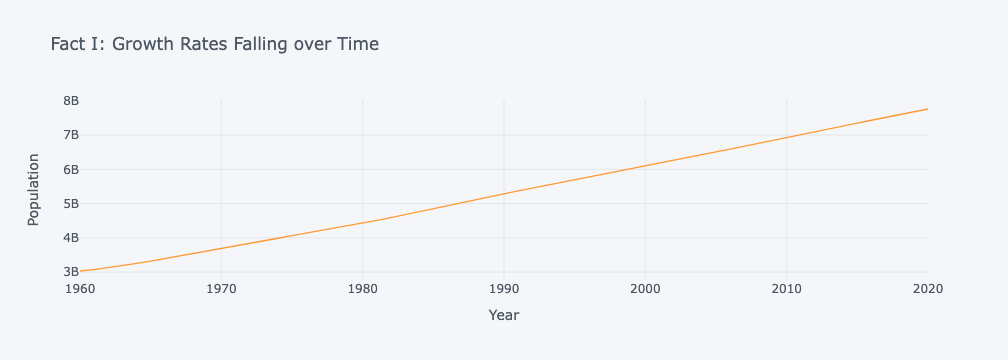

In [7]:
# Useful arguments to pass include xTitle, yTitle, Title
world.iplot(title="Fact I: Growth Rates Falling over Time",xTitle='Year',yTitle='Population')

##### Plotting Different Countries&rsquo; Population Growth Rates



Globally, population growth has been basically linear over the last 60
 years.

-   Increases by 1 billion about every 12 years.
-   Implies *rate* of growth falling over time.

How do population growth rates vary by country?



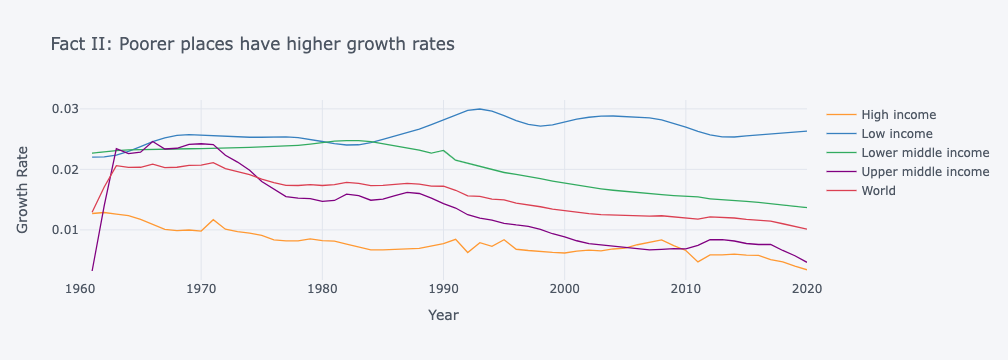

In [8]:
import numpy as np

variable_labels = {"SP.POP.TOTL":"Population"}

# Three letter codes come from wbdata.get_country()
countries = {"WLD":"World",
             "LIC":"Low income",
             "LMC":"Low-medium income",
             "UMC":"Upper-medium income",
             "HIC":"High income",
            }

df = wbdata.get_dataframe(variable_labels, country = countries).squeeze()

df = df.unstack('country')
# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
np.log(df).diff().iplot(title="Fact II: Poorer places have higher growth rates",
                        yTitle="Growth Rate",xTitle='Year')

##### Population Growth vs Per capita GDP



Our second stylized fact was that there&rsquo;s an inverse association between
 income and population growth.  We&rsquo;ll investigate this fact here, 
 constructing a scatter plot relating population growth rates to (log) GDP per capita.



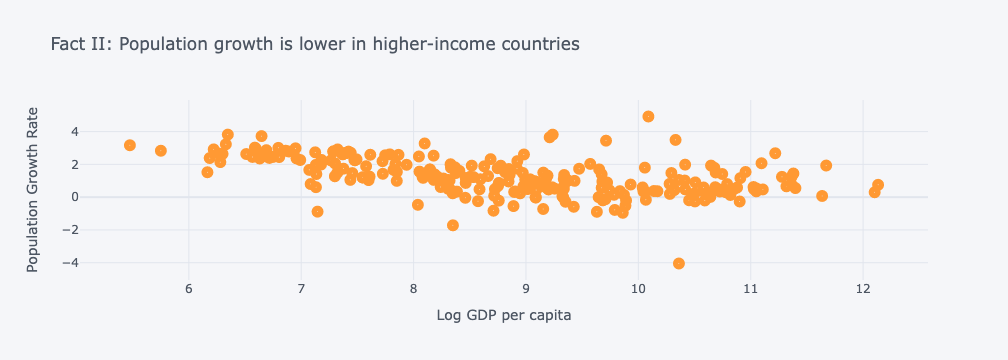

In [9]:
import numpy as np
# wbdata.search_indicators("GDP per capita")

indicators = {"NY.GDP.PCAP.CD":"GDP per capita",
              "SP.DYN.TFRT.IN":"Total Fertility Rate",
              "SP.POP.GROW":"Population Growth Rate",
              "SP.DYN.AMRT.MA":"Male Mortality",
              "SP.DYN.AMRT.FE":"Female Mortality",
              "SP.POP.1564.FE.ZS":"% Adult Female",
              "SP.POP.TOTL.FE.ZS":"% Female"}

data = wbdata.get_dataframe(indicators)

# Make years ints instead of strings
data.reset_index(inplace=True)
data['date'] = data['date'].astype(int)
data.set_index(['country','date'],inplace=True)

df = data.query("date==2018") # Latest year missing some data

# All dates now the same; not a useful index
df.index = df.index.droplevel('date')

df['Log GDP per capita'] = np.log(df['GDP per capita'])

df.iplot(kind='scatter', mode='markers', symbol='circle-dot',
         x="Log GDP per capita",y="Population Growth Rate",
         text=df.reset_index('country')['country'].values.tolist(),
         xTitle="Log GDP per capita",yTitle="Population Growth Rate",
         title="Fact II: Population growth is lower in higher-income countries")

##### Decomposing Population Growth



Consider the human population at a particular time $t$, and let the
 size of the population be given by $N_t$ at time $t$.  Also, let
 $\phi_t$ be the *share* of the population at time $t$ that are women
 of child-bearing age (e.g., 15&#x2013;49).

Now, as a matter of accounting, population in the next period $t+1$ will be given by
$$
    N_{t+1} = (1-\mbox{mortality rate})N_t + \mbox{TFR}\cdot\phi_t N_t.
 $$

Thus, we can think of population growth as depending on mortality, fertility, and the share of the population that can bear children.  

We&rsquo;ve seen that population growth is falling over time.  Is the fall due to changes in mortality, fertility, or $\phi_t$?



##### Mortality Over Time



Can mortality changes account for declining population?  Look at
 deaths per 10,000 people.



In [1]:
world = data.query("country=='World'")

# Drop country index for World data
world.index = world.index.droplevel('country')

world[["Male Mortality","Female Mortality"]].iplot(title="Deaths per 10,000")

##### Adult female share of population over time



Decreases in population growth could also be due to a decreasing share of adult women, perhaps due to gender selection at birth.  How does this share ($\phi_t$) vary over time?



In [1]:
# % Adult Female is % of females who are adult.
# To make a share of total population take product
world["% Adult Female"] = world["% Adult Female"]*world["% Female"]/100

world["% Adult Female"].iplot(title="% of Adult Females in World Population")

##### Fertility over time



Finally, decreases in population growth could be due to reduced fertility.  How does global fertility vary over time?



In [1]:
world["Total Fertility Rate"].iplot()

##### Relation between income and fertility



In [1]:
df.iplot(kind='scatter', mode='markers', symbol='circle-dot',
         x="Log GDP per capita",y="Total Fertility Rate",
         text=df.reset_index('country')['country'].values.tolist(),
         xTitle="Log GDP per capita",yTitle="Total Fertility Rate",
         title="Fact II: Women in Poorer Countries Have Higher Fertility")

### Understanding Age-Sex Composition



To relate the total fertility rate (TFR) of a country to population
 growth, we need to know some other things about the country:

1.  Women of child-bearing age, as a proportion of population
2.  Mortality rates (which will vary with age)
3.  Rates of net migration

We won&rsquo;t have much to say about migration yet, but the number of
women of child-bearing age and rates of mortality can both be
helpfully visualized by constructing *population pyramids* that
report information on the age and sex composition of a population at
a point in time.



#### Building a population pyramid



The next code builds a list of the age-sex counts we want
 (e.g., how many males are there between the ages of 10-14?).



In [1]:
# Data from WDI on age-sex comes in the forms of variables
# which take the form "SP.POP.LLHH.MA" for males
# and "SP.POP.LLHH.FE" for females, where LL is the *low* end of
# age range, like "05" for 5-yo, and HH is the *high* end.

# We construct a list of age-ranges.

# Start with an empty list of age-rages
age_ranges = []

# Ranges top out at 80, and go in five year increments
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

print(age_ranges)

Next we construct a dictionary of indicators, with labels, that we
 want to grab.



In [1]:
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

print(variables)

Get the data!



In [1]:
# WLD is the World; substitute your own code or list of codes.
# Remember you can search for the appropriate codes using
# wbdata.search_countries("")

df = wbdata.get_dataframe(variables,country="WLD")
print(df.query("date=='2018'").sum(axis=0))

#### Plotting Population Pyramid



Now we put together some code for the population pyramid.  The structure
 of the DataFrames is more complicated than it was above, so using the simple `cufflinks` library won&rsquo;t work here (or at least I don&rsquo;t see quite how to do it).   We use a more general `plot.ly` library instead.



In [1]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = 2018

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='purple'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

#### Changes in Pyramid Over Time



Let&rsquo;s try a more ambitious visualization, showing how the shape of the population pyramid has changed decade by decade.



In [1]:
# Count down by increments of 20 years
years = range(2018,1960,-20)

# This makes a list of graphs, year by year
bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
        for year in years]
          
bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
         for year in years]

py.iplot(dict(data=bins, layout=layout))